### Using kernels with perceptron algorithm to separate non-linearly separable data

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
import util

In [4]:
def initial_state():
    return []

In [6]:
def sign(a: int):
    if a >= 0:
        return 1
    else:
        return 0

In [18]:
def predict(state: list, kernel, x_i: int): 
  sum_ = 0
  for beta, x in state:
    sum_ += beta * kernel(x, x_i)

  return sign(sum_)

In [9]:
def update_state(state: list, kernel, learning_rate: float, x_i: int, y_i: int):
    beta = learning_rate * (y_i - predict(state, kernel, x_i))
    state.append((beta, x_i))

In [19]:
def dot_kernel(a: np.ndarray, b: np.ndarray):
    return np.dot(a, b)

In [20]:
def rbf_kernel(a: np.ndarray, b: np.ndarray, sigma=1):
    distance = (a - b).dot(a - b)
    scaled_distance = -distance / (2 * sigma ** 2)
    return math.exp(scaled_distance)

In [12]:
def train_perceptron(kernel_name: str, kernel, learning_rate: float):
    train_x, train_y = util.load_csv('./ds5_train.csv')

    state = initial_state()
    for x_i, y_i in zip(train_x, train_y):
        update_state(state, kernel, learning_rate, x_i, y_i)
    
    test_x, test_y = util.load_csv('./ds5_test.csv')

    plt.figure(figsize=(12, 8))
    util.plot_contour(lambda a: predict(state, kernel, a))
    util.plot_points(test_x, test_y)
    plt.savefig('./output/p05_{}_output.pdf'.format(kernel_name))

    predict_y = [predict(state, kernel, test_x[i, :])
                 for i in range(test_y.shape[0])]

    np.savetxt('./output/p05_{}_predictions'.format(kernel_name), predict_y)

In [13]:
def main():
    train_perceptron('dot', dot_kernel, 0.5)
    train_perceptron('rbf', rbf_kernel, 0.5)

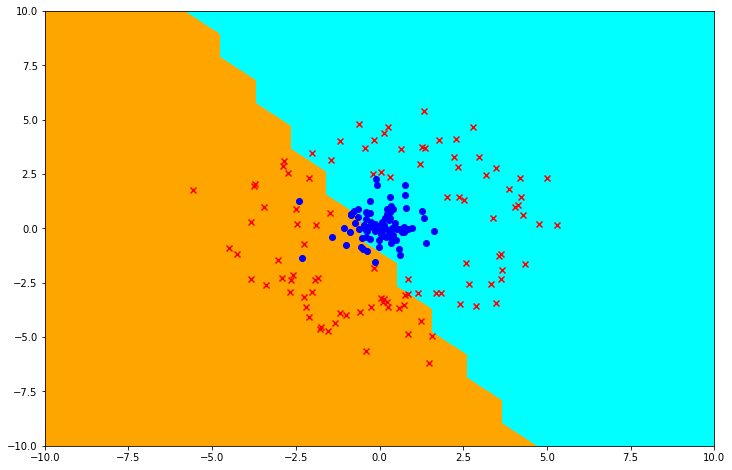

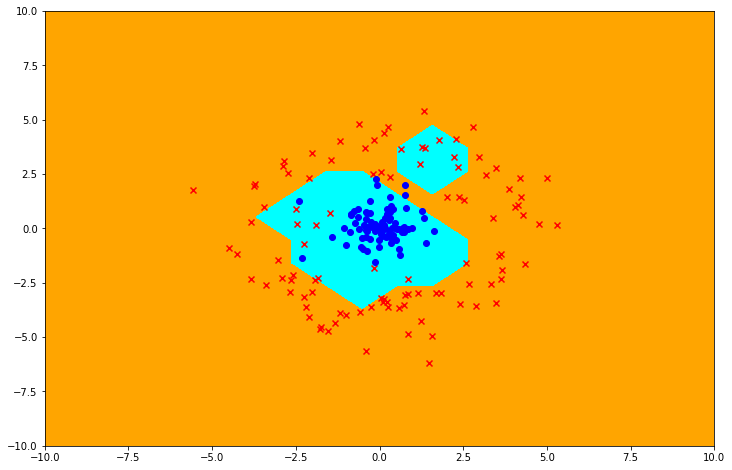

In [16]:
main()